In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Univariate Analysis

In [3]:
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Description of columns:

Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

#### Encoding the 'sex' column to analyze it clearly

In [5]:
oe = OrdinalEncoder()
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1).astype(str))
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [73]:
print(df.Rings.unique())

[15  7  9 10  8 16 19 14 11 12 18 13  5  4  6 17  3]


In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

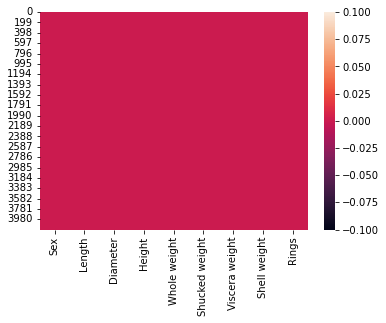

In [9]:
sns.heatmap(df.isnull())

Observation: There are no null values in the dataset.

In [10]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

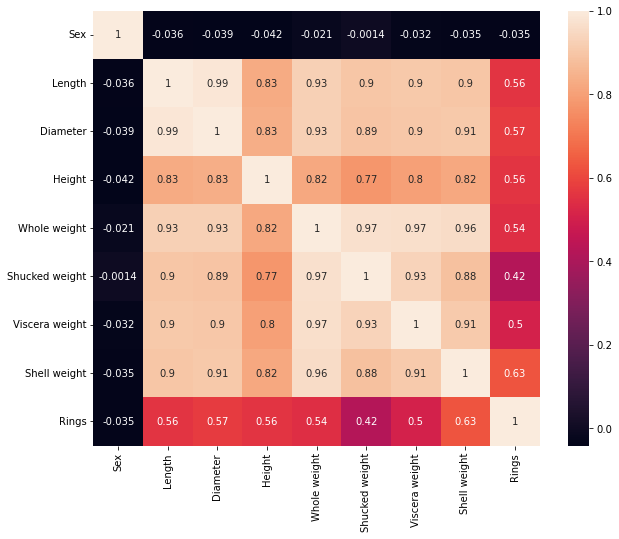

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

Observation: There is high correlation between several predictors in the dataset.

In [12]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observation: Large gap between 75th percentile and max in Height, Whole Weight, Shucked Weight, Viscera Weight and Shell weight. This means outliers are present.

Mean and Median of all columns are similar to each other so skewness is present but not much.

Minimum height is 0 which is not possible so we will remove 0 values.

In [7]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,1.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,1.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [8]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

Changing dependent variable from rings to age

In [9]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [10]:
df.skew()

Sex              -0.098224
Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
age               1.113754
dtype: float64

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

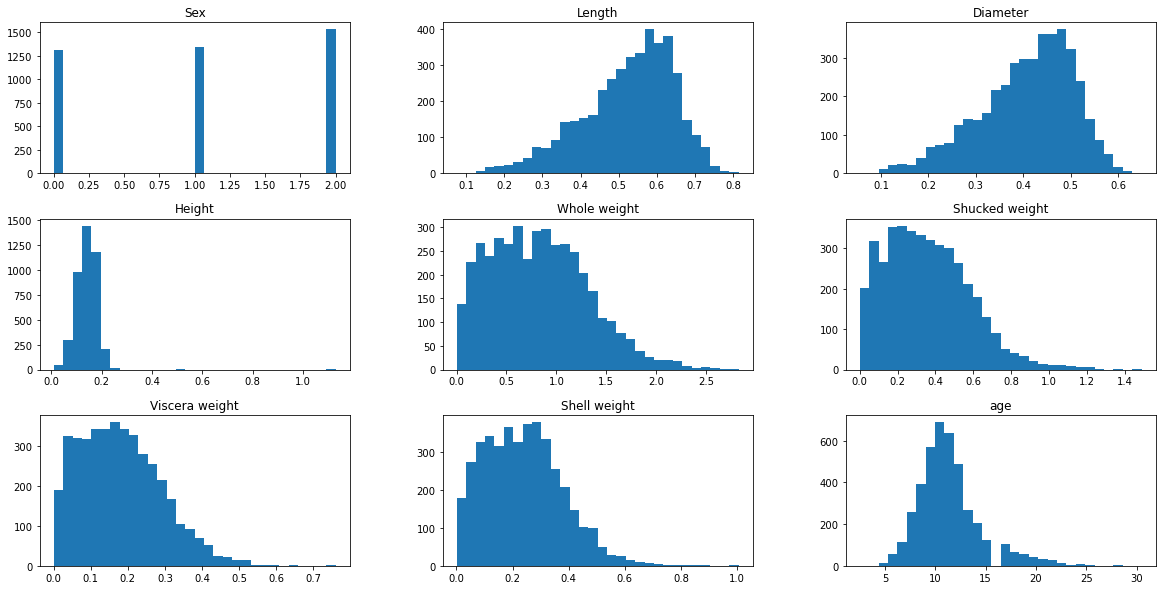

In [11]:
df.hist(figsize=(20,10), grid=False, layout=(3, 3), bins = 30)

Observation: skewness is present in columns height, whole weight, viscera weight, shell weight.

Text(0.5, 1.0, 'Height')

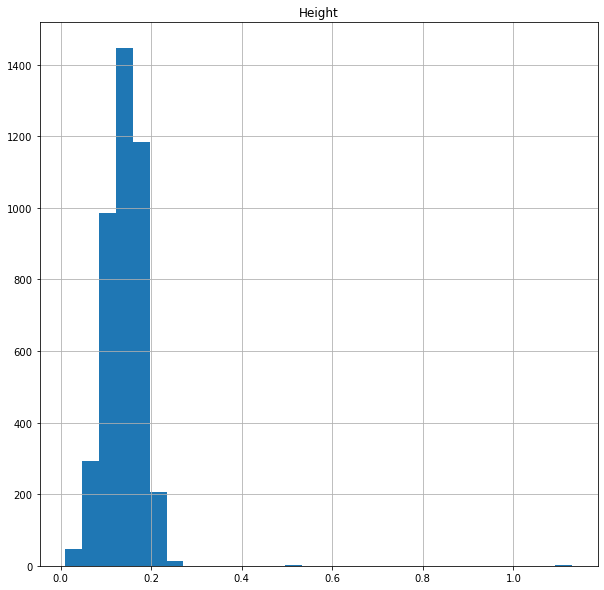

In [12]:
df['Height'].hist(figsize=(10,10), bins=30)
plt.title('Height')

Observation: The distribution in the height column is normal till 75th percentile and then it becomes skewed right due to the outliers.

Text(0.5, 1.0, 'Shucked weight')

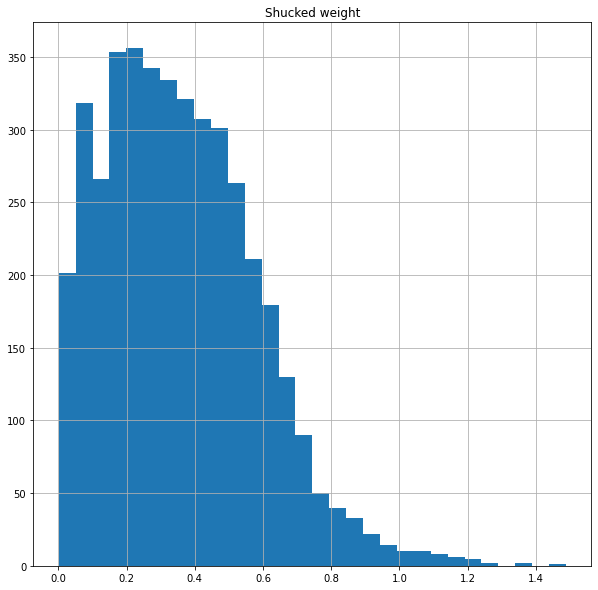

In [13]:
df['Shucked weight'].hist(figsize=(10,10), bins=30)
plt.title('Shucked weight')

Observation: The distribution in the shucked weight column is normal till 75th percentile and then it becomes skewed right due to the outliers.

Text(0.5, 1.0, 'Whole weight')

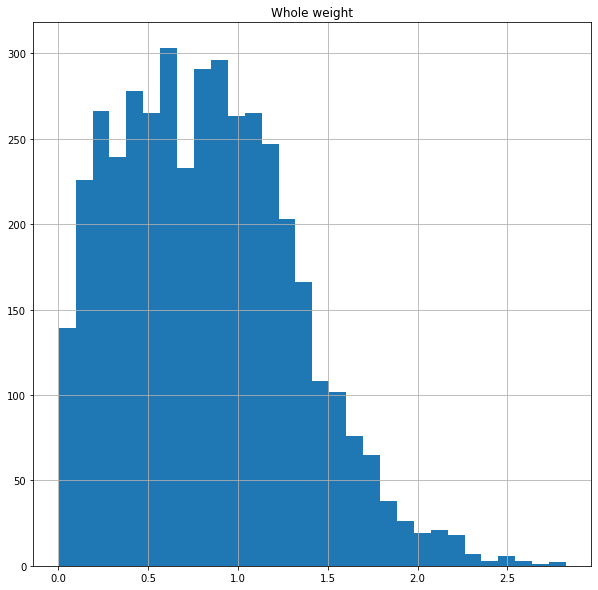

In [14]:
df['Whole weight'].hist(figsize=(10,10), bins=30)
plt.title('Whole weight')

Observation: The distribution in the whole weight column is normal till 75th percentile and then it becomes skewed right due to the outliers.

Text(0.5, 1.0, 'Viscera Weight')

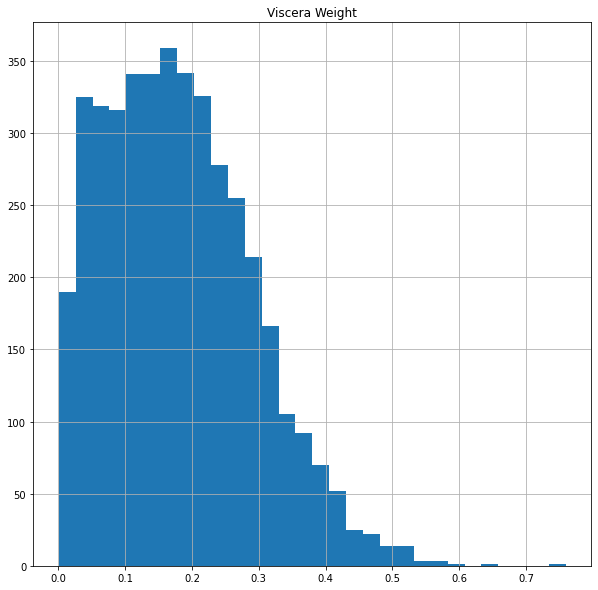

In [15]:
df['Viscera weight'].hist(figsize=(10,10), bins=30)
plt.title('Viscera Weight')

Observation: The distribution in the viscera weight column is normal till 75th percentile and then it becomes skewed right due to the outliers.

Text(0.5, 1.0, 'Outliers in the columns')

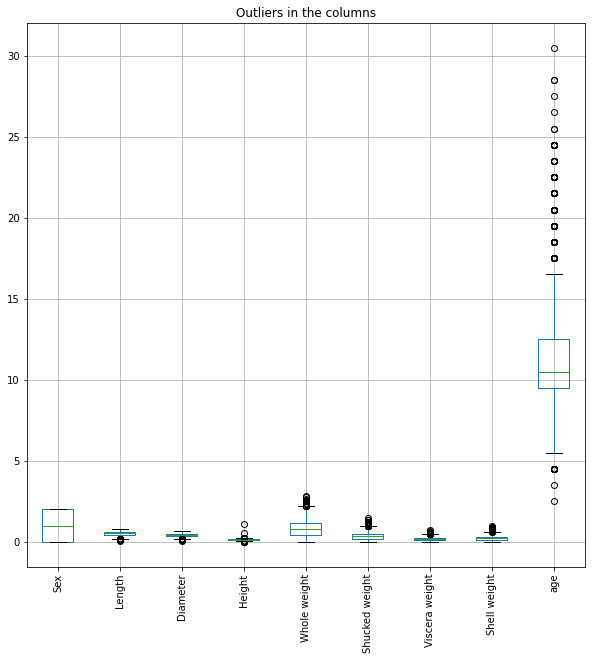

In [16]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

Observation: Outliers are present in every column except 'sex'

<AxesSubplot:>

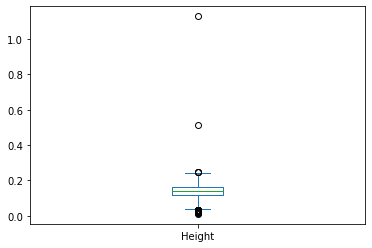

In [17]:
df['Height'].plot.box()

Observation: Outliers are present.

<AxesSubplot:>

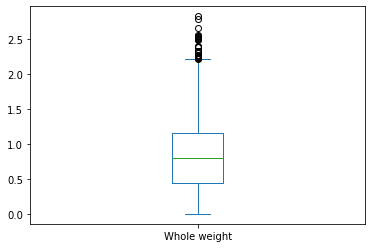

In [18]:
df['Whole weight'].plot.box()

Observation: Outliers are present.

<AxesSubplot:>

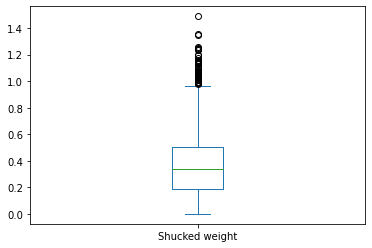

In [19]:
df['Shucked weight'].plot.box()

Observation: Outliers are present.

<AxesSubplot:>

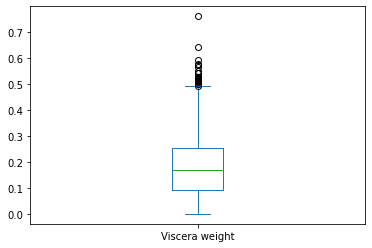

In [20]:
df['Viscera weight'].plot.box()

Observation: Outliers are present.

<AxesSubplot:>

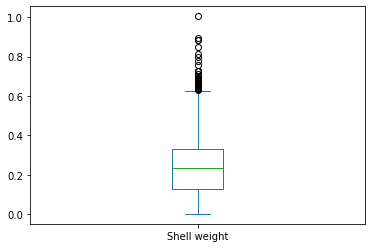

In [21]:
df['Shell weight'].plot.box()

Observation: Outliers are present.

<AxesSubplot:xlabel='Sex', ylabel='count'>

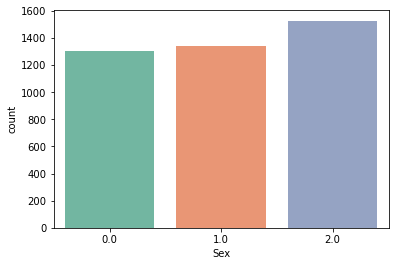

In [22]:
sns.countplot(x = 'Sex', data = df, palette="Set2")

Observation: categories in 'sex' column are more or less evenly distributed

<AxesSubplot:xlabel='Sex', ylabel='age'>

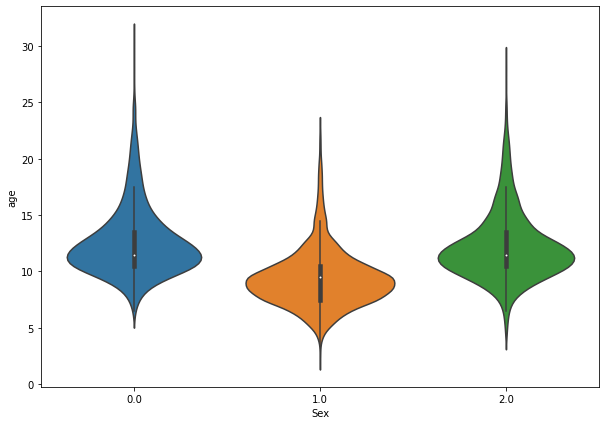

In [24]:
plt.figure(figsize = (10,7))
sns.violinplot(x = 'Sex', y = 'age', data = df)

Observation: there isn't much difference in age for male and female but infants are on lower side.

<AxesSubplot:ylabel='age'>

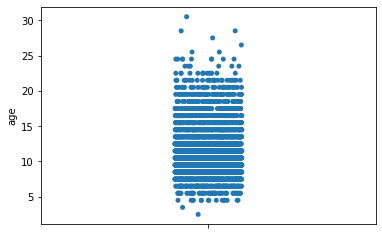

In [25]:
sns.stripplot(y=df['age'])

Observation: The target variable also contains outliers but is evenly distributed for the most part.

<AxesSubplot:xlabel='age'>

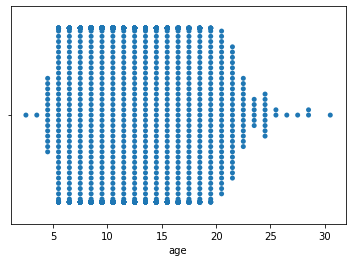

In [26]:
sns.swarmplot(x=df['age'])

Observation: The target variable also contains outliers but is evenly distributed for the most part.

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

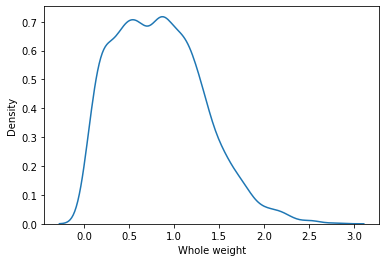

In [44]:
sns.kdeplot(df['Whole weight'])

Observation: The distribution is normal until the 75th percentile where it becomes skewed right

<AxesSubplot:xlabel='Height', ylabel='Density'>

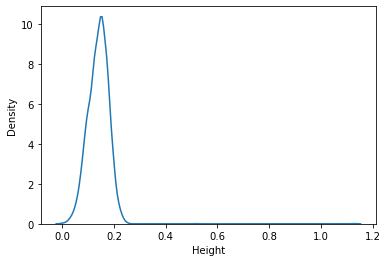

In [45]:
sns.kdeplot(df['Height'])

Observation: The distribution is normal until the 75th percentile (0.25) where it becomes skewed right

## Bivariate Analysis

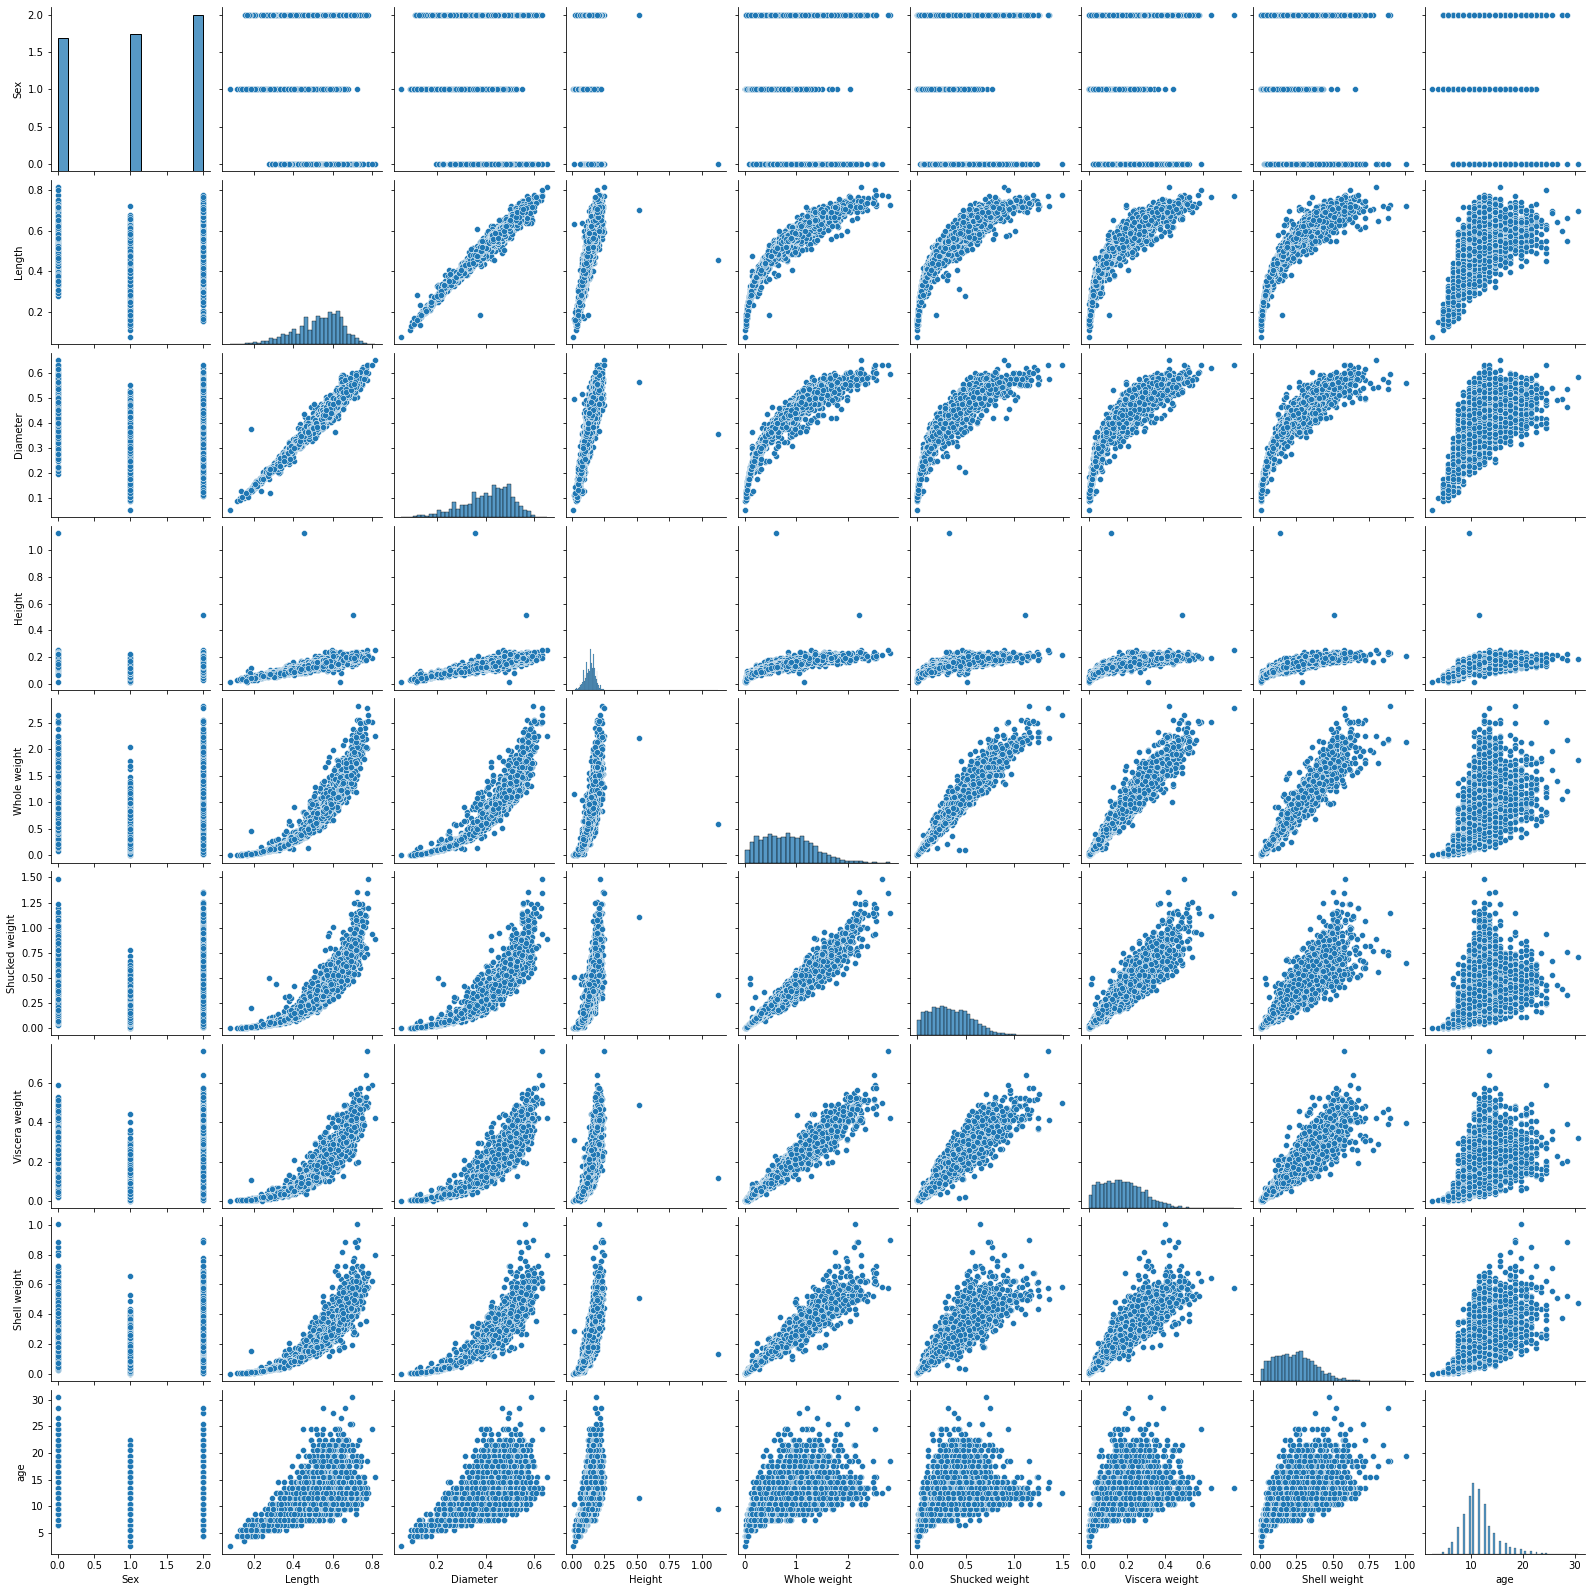

In [27]:
sns.pairplot(df)

Text(0, 0.5, 'Age')

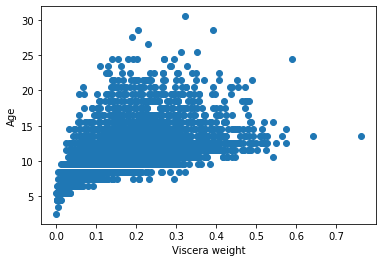

In [28]:
plt.scatter(x=df['Viscera weight'],y=df['age'])
plt.xlabel('Viscera weight')
plt.ylabel('Age')

Observation: age is higher when viscera weight is higher.

Text(0, 0.5, 'age')

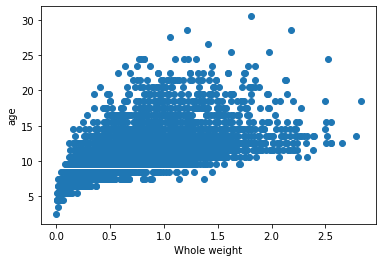

In [29]:
plt.scatter(x=df['Whole weight'],y=df['age'])
plt.xlabel('Whole weight')
plt.ylabel('age')

Observation: age is higher when whole weight is higher.

Text(0, 0.5, 'age')

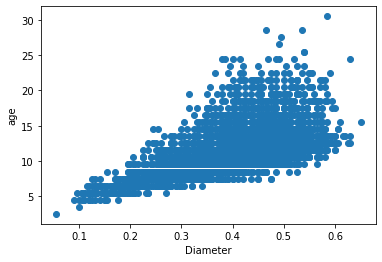

In [30]:
plt.scatter(x=df['Diameter'],y=df['age'])
plt.xlabel('Diameter')
plt.ylabel('age')

Observation: age is higher when diameter is higher.

Text(0, 0.5, 'age')

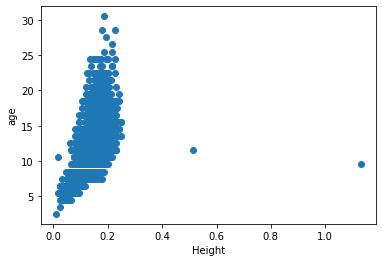

In [31]:
plt.scatter(x=df['Height'],y=df['age'])
plt.xlabel('Height')
plt.ylabel('age')

Observation: age is higher when height is higher.

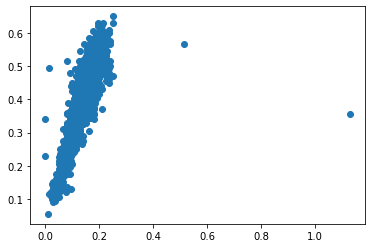

In [33]:
plt.scatter(x=df['Height'],y=df['Diameter'])

Observation: Height and Diameter are highly correlated

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

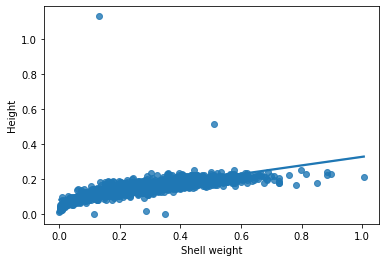

In [46]:
sns.regplot('Shell weight','Height',df)

Observation: Shell weight and Height are highly correlated

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

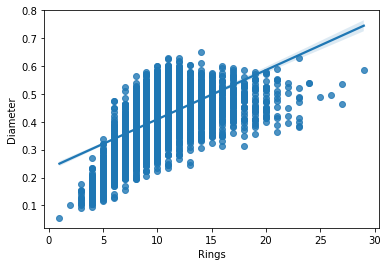

In [47]:
sns.regplot('Rings','Diameter',df)

Observation: Rings and Diameter have a positive correlation

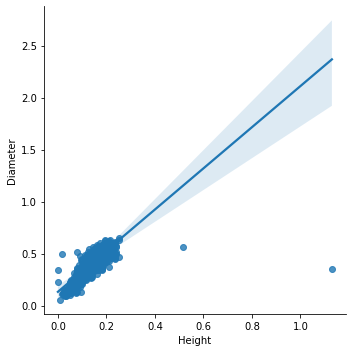

In [48]:
sns.lmplot('Height', 'Diameter',df)

Observation: very high positive correlation between height and diameter

## Removing skewness

In [32]:
df.skew()

Sex              -0.098224
Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
age               1.113754
dtype: float64

Height has a lot of skewness

In [33]:
df['Height'].mean()

0.1395832335329331

In [34]:
df['Height'].median()

0.14

In [35]:
df['Height'].max()

1.13

In [36]:
df['Height'] = np.sqrt(df['Height'])

In [37]:
df.skew()

Sex              -0.098224
Length           -0.640993
Diameter         -0.610182
Height           -0.176012
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
age               1.113754
dtype: float64

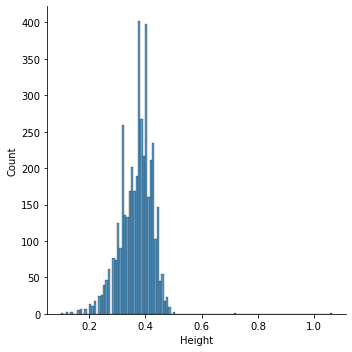

In [38]:
sns.displot(df['Height'])

Observation: The distribution in height is normal now.

## Checking mutlicollinearity with Variance Inflation Factor

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [40]:
vif_calc()

,variables,VIF FACTOR
0,Sex,2.605947
1,Length,784.652461
2,Diameter,756.600065
3,Height,138.287146
4,Whole weight,444.220936
5,Shucked weight,118.635526
6,Viscera weight,64.821195
7,Shell weight,84.014702
8,age,28.948931


<AxesSubplot:>

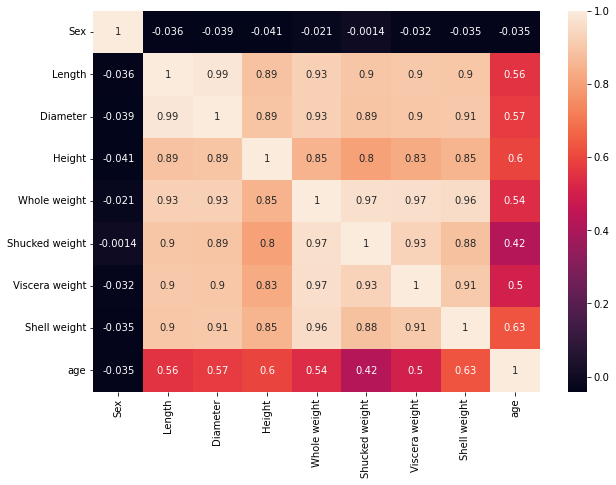

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

#### removing unnecessary data containing high correlation

In [42]:
corr = df.corr()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [43]:
df.drop(columns_to_drop, axis=1, inplace = True)

In [44]:
df.head()

,Sex,Length,Height,Whole weight,age
0,2.0,0.455,0.308221,0.5140,16.5
1,2.0,0.350,0.300000,0.2255,8.5
2,0.0,0.530,0.367423,0.6770,10.5
3,2.0,0.440,0.353553,0.5160,11.5
4,1.0,0.330,0.282843,0.2050,8.5


In [45]:
vif_calc()

,variables,VIF FACTOR
0,Sex,2.569022
1,Length,176.676300
2,Height,136.489411
3,Whole weight,14.465099
4,age,21.210586


<AxesSubplot:>

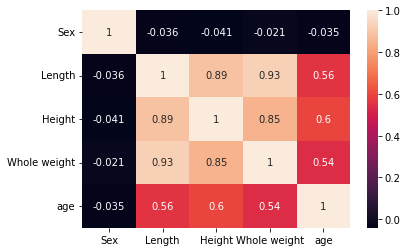

In [46]:

sns.heatmap(df.corr(), annot=True)

## changing age to categorical data type

In [47]:
df.head()

,Sex,Length,Height,Whole weight,age
0,2.0,0.455,0.308221,0.5140,16.5
1,2.0,0.350,0.300000,0.2255,8.5
2,0.0,0.530,0.367423,0.6770,10.5
3,2.0,0.440,0.353553,0.5160,11.5
4,1.0,0.330,0.282843,0.2050,8.5


In [51]:
Age = []
for i in df["Whole weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
df["age"] = Age
df.head()

,Sex,Length,Height,Whole weight,age
0,2.0,0.455,0.308221,0.5140,1
1,2.0,0.350,0.300000,0.2255,1
2,0.0,0.530,0.367423,0.6770,2
3,2.0,0.440,0.353553,0.5160,1
4,1.0,0.330,0.282843,0.2050,1


As per previous observations, weight increases with age so we use that as a threshold while cateogorises age.

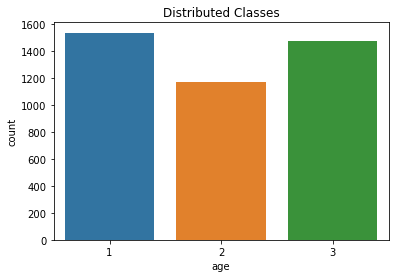

In [52]:
sns.countplot('age', data=df)
plt.title('Distributed Classes')
plt.show()

In [53]:
df['age'].value_counts()

1    1534
3    1473
2    1168
Name: age, dtype: int64

## Splitting data for training and testing

In [54]:
x = df.iloc[:,0:-1]
x

,Sex,Length,Height,Whole weight
0,2.0,0.455,0.308221,0.5140
1,2.0,0.350,0.300000,0.2255
2,0.0,0.530,0.367423,0.6770
3,2.0,0.440,0.353553,0.5160
4,1.0,0.330,0.282843,0.2050
...,...,...,...,...
4172,0.0,0.565,0.406202,0.8870
4173,2.0,0.590,0.367423,0.9660
4174,2.0,0.600,0.452769,1.1760
4175,0.0,0.625,0.387298,1.0945


In [55]:
y = df.iloc[:,-1]
y

0       1
1       1
2       2
3       1
4       1
       ..
4172    2
4173    2
4174    3
4175    3
4176    3
Name: age, Length: 4175, dtype: int64

In [56]:
y.value_counts()

1    1534
3    1473
2    1168
Name: age, dtype: int64

In [78]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()

In [79]:
models = [lr,knn,svc,dtc]

In [59]:
best_random_state = 0
best_score = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'At random score {i}, accuracy score is {score}')
    if score > best_score:
        best_score = score
        best_random_state = i
print(f'Best score is {best_score} at random state {best_random_state}')

At random score 0, accuracy score is 0.9952095808383233
At random score 1, accuracy score is 0.9904191616766467
At random score 2, accuracy score is 0.9940119760479041
At random score 3, accuracy score is 0.9964071856287425
At random score 4, accuracy score is 0.9952095808383233
At random score 5, accuracy score is 0.9904191616766467
At random score 6, accuracy score is 0.9904191616766467
At random score 7, accuracy score is 0.9916167664670659
At random score 8, accuracy score is 0.9904191616766467
At random score 9, accuracy score is 0.9988023952095808
At random score 10, accuracy score is 0.9868263473053892
At random score 11, accuracy score is 0.9928143712574851
At random score 12, accuracy score is 0.9964071856287425
At random score 13, accuracy score is 0.9916167664670659
At random score 14, accuracy score is 0.9904191616766467
At random score 15, accuracy score is 0.9940119760479041
At random score 16, accuracy score is 0.9952095808383233
At random score 17, accuracy score is 0.9

In [61]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=9)

In [80]:
for i in models:
    i.fit(xtrain,ytrain)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}%')

Model LogisticRegression() had training score of 99.16167664670658%
Model KNeighborsClassifier() had training score of 99.28143712574851%
Model SVC() had training score of 99.01197604790418%
Model DecisionTreeClassifier() had training score of 99.97005988023953%


##### We will choose decision tree classifier for further analysis

In [68]:
dtc_params = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1,10),
             'min_samples_split': range(1,10),
             'min_samples_leaf': range(1,5)}

In [71]:
grid = GridSearchCV(dtc, dtc_params, cv=10, verbose=1, n_jobs=-1)

In [72]:
grid.fit(xtrain,ytrain)
grid.best_params_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [73]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2)

In [81]:
cross_val_score(dtc, xtrain,ytrain,cv=5)

array([1.        , 0.99850299, 1.        , 1.        , 1.        ])

In [89]:
dtc.fit(xtrain, ytrain)
pred = dtc.predict(xtest)
print(f'The accuracy score of this model is: {accuracy_score(ytest, pred) * 100}%')
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

The accuracy score of this model is: 100.0%
[[300   0   0]
 [  0 235   0]
 [  0   0 300]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00       300

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835



#### AUC ROC curve cannot be graphed because the dependent variable is multiclass.

## Conclusion: Decision Tree model gives the best results with 100% accuracy score.

## Saving best model

In [90]:
import pickle
filename = 'abalone.pkl'
pickle.dump(dtc, open(filename, 'wb'))

loading it back and checking accuracy:

In [92]:
model = pickle.load(open('abalone.pkl', 'rb'))
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
accuracy_score(ytest,pred)*100

100.0